In [1]:
!pip install numpy tensorflow opencv-python matplotlib

In [2]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import io
from google.colab import files

1. Import Data

In [3]:
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        img = Image.open(os.path.join(directory, filename))
        img = img.resize((224, 224))
        img = img.convert('RGB')
        img = np.array(img) / 255.0
        images.append(img)

    return images

In [4]:
tumor_images = load_images('/content/drive/MyDrive/brain_tumor_dataset/yes')
no_tumor_images = load_images('/content/drive/MyDrive/brain_tumor_dataset/no')

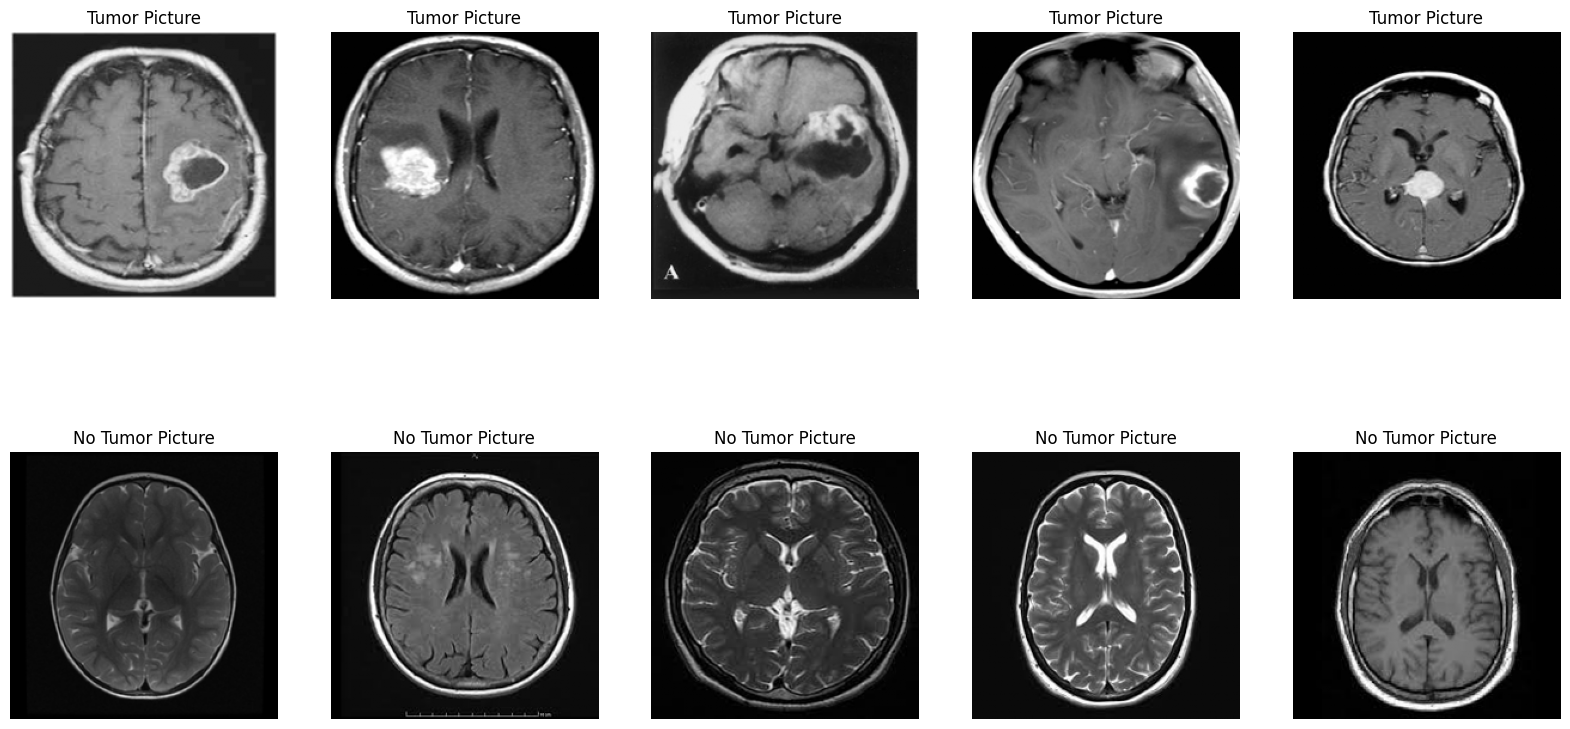

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Menampilkan gambar dengan tumor
for i in range(5):
    axes[0, i].imshow(tumor_images[i])  # Menampilkan gambar tumor
    axes[0, i].set_title('Tumor Picture')  # Menetapkan judul
    axes[0, i].axis('off')  # Mematikan axis

# Menampilkan gambar tanpa tumor
for i in range(5):
    axes[1, i].imshow(no_tumor_images[i])  # Menampilkan gambar tanpa tumor
    axes[1, i].set_title('No Tumor Picture')  # Menetapkan judul
    axes[1, i].axis('off')  # Mematikan axis

plt.show()  # Menampilkan hasil

In [6]:
type(tumor_images)

list

In [7]:
len(tumor_images)

155

In [8]:
len(no_tumor_images)

98

2. Labeling

In [9]:
def assign_labels(tumor_images, no_tumor_images):
    tumor_labels = np.ones(len(tumor_images))
    no_tumor_labels = np.zeros(len(no_tumor_images))
    return tumor_labels, no_tumor_labels

tumor_labels, no_tumor_labels = assign_labels(tumor_images, no_tumor_images)

In [10]:
tumor_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [11]:
no_tumor_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
type(tumor_labels)

numpy.ndarray

In [13]:
 data = tumor_images + no_tumor_images
 labels = np.concatenate((tumor_labels, no_tumor_labels) , axis=0)

In [14]:
data

[array([[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [0.98431373, 0.98431373, 0.98431373],
         [0.97647059, 0.97647059, 0.97647059]],
 
        [[1.        , 1.        , 1.        ],
         [0.94901961, 0.94901961, 0.94901961],
         [0.82352941, 0.82352941, 0.82352941],
         ...,
         [0.8       , 0.8       , 0.8       ],
         [0.94901961, 0.94901961, 0.94901961],
         [0.98823529, 0.98823529, 0.98823529]],
 
        [[0.98431373, 0.98431373, 0.98431373],
         [0.83137255, 0.83137255, 0.83137255],
         [0.45098039, 0.45098039, 0.45098039],
         ...,
         [0.45098039, 0.45098039, 0.45098039],
         [0.87058824, 0.87058824, 0.87058824],
         [1.        , 1.        , 1.        ]],
 
        ...,
 
        [[0.98431373, 0.98431373, 0.98431373],
         [0.83137255, 0.83137255, 0.83137

In [15]:
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
data[0].shape

(224, 224, 3)

3. Spliting data

In [17]:
X = np.array(data)
y = np.array(labels)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [19]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

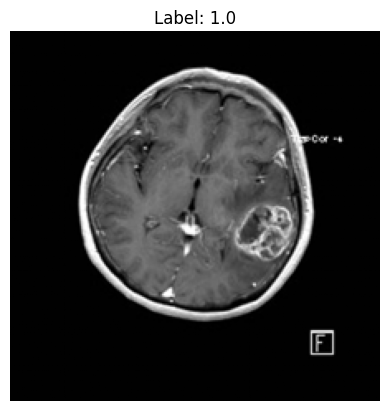

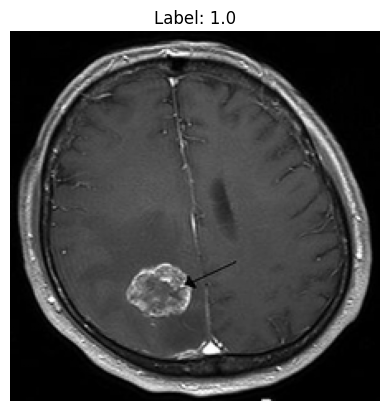

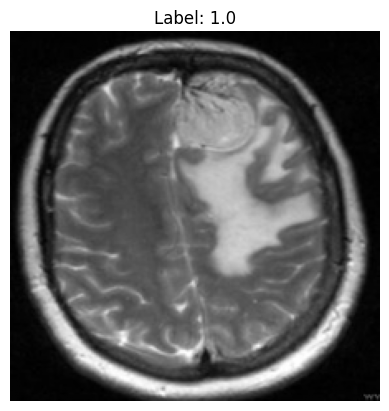

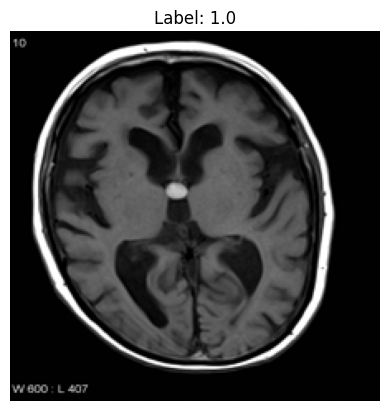

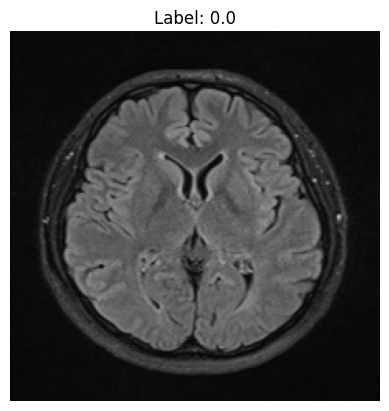

In [20]:
for image, label in train.take(5):
    plt.figure()
    plt.imshow(image.numpy())
    plt.title('Label: {}'.format(label.numpy()))
    plt.axis('off')
    plt.show()

In [21]:
validation_size = int(0.1 * 202)
train = train.skip(validation_size)
val = train.take(validation_size)

In [22]:
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)
text = test.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)

4. Training Data

In [23]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3), padding='valid'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 394272)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │     100,933,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,935,041 (385.04 MB)

 Trainable params: 100,935,041 (385.04 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer = 'adam',
              loss= 'binary_crossentropy',
              metrics=["accuracy"])

In [26]:
history = model.fit(train, validation_data = val, epochs = 10, verbose = 1)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.5859 - loss: 15.0852 - val_accuracy: 0.7500 - val_loss: 1.0272
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.7190 - loss: 3.4158 - val_accuracy: 0.8000 - val_loss: 1.3044
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.6830 - loss: 2.1286 - val_accuracy: 0.9500 - val_loss: 0.1236
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.8483 - loss: 0.8388 - val_accuracy: 0.8500 - val_loss: 0.3929
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.7825 - loss: 0.6885 - val_accuracy: 1.0000 - val_loss: 0.0458
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9168 - loss: 0.2205 - val_accuracy: 1.0000 - val_loss: 0.0876
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9089 - loss: 0.2442 - val_accuracy: 1.0000 - val_loss: 0.0603
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9508 - loss: 0.1596 - val_accuracy: 1.0000 - val_loss: 0.0329
Epoch 9

In [27]:
evaluation = model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step - accuracy: 0.7833 - loss: 1.0041


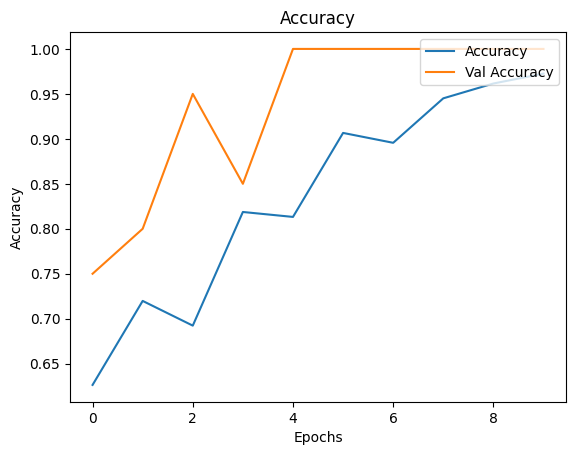

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc='upper right')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

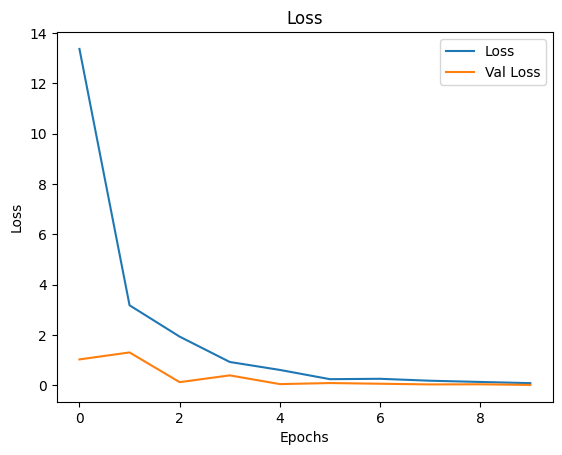

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val Loss'], loc='upper right')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [30]:
model.save("/content/drive/MyDrive/tumor_otak2.h5")

5. Testing

In [31]:
def load_uploaded_image(image_bytes):
    img = Image.open(io.BytesIO(image_bytes))
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array / 255.0
    return img_array

def predict_image(image_bytes):
    img_array = load_uploaded_image(image_bytes)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)

    if prediction[0][0] > 0.5:
        return "Tumor detected"
    else:
        return "No tumor detected"

In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]

img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image(image_bytes)
print(result)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')